In [1]:
import os 
from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.mango.genotypes import *
import matplotlib.pyplot as plt

In [2]:
################ For testing purposes only ################
try:
   testMode
except NameError:
   testMode = False

try:
    vcfFile
except NameError:
   # NOTE: this is for a local example. Based on file placement, you may have to change this path
    vcfFile = os.getcwd() + "/../genodata.v3.vcf"

# Mango variant visualization tools 


### Load Genotypes

In [3]:
ac = ADAMContext(spark)
genotypes = ac.loadGenotypes(vcfFile)

## Create Summary for Genotype Data

In [4]:
gd = GenotypeSummary(spark, ac, genotypes, sample=0.8)

### Plot histogram of Variant Count per Sample

In [5]:
variantDist = gd.getVariantsPerSampleDistribution()

Computing coverage variants per sample distribution...


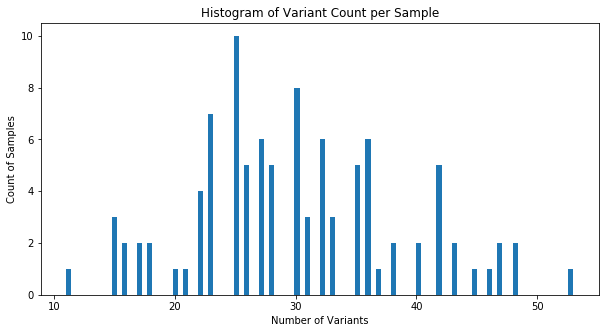

In [6]:
ax, results = variantDist.plotDistributions(bins=100, testMode=testMode)

if(ax != None and not testMode):
    ax.set_title("Histogram of Variant Count per Sample")
    ax.set_xlabel("Number of Variants")
    ax.set_ylabel("Count of Samples")
    plt.show()

Computing (Heterozygote/Homozygote) ratio distribution


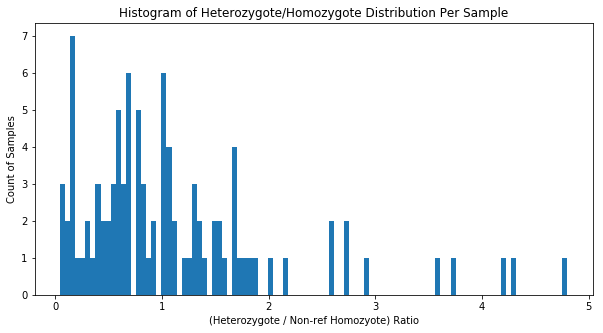

In [7]:
hetHomDist = gd.getHetHomRatioDistribution()
ax, results = hetHomDist.plot()

if(ax != None and not testMode):
    ax.set_title("Histogram of Heterozygote/Homozygote Distribution Per Sample")
    ax.set_xlabel("(Heterozygote / Non-ref Homozyote) Ratio")
    ax.set_ylabel("Count of Samples")
    plt.show()